In [195]:
import os
import glob
import re
import pandas as pd
import seaborn as sns
 
from preprocessing import *
from pipeline import one_dim_x_train
import soundfile

In [178]:
os.chdir('/Users/dhk/Desktop/Github/HeartDiseasePrediction/assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3')

data = pd.read_csv("training_data.csv")

data.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [179]:
df = data_wrangling(data)

df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID,Recording Channels,Murmur Channels
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,CC2015,NaN,"[AV, PV, TV, MV]",NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,NaN,NaN,NaN,NaN,NaN,1,CC2015,NaN,"[AV, PV, TV, MV]","[AV, MV, PV, TV]"
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,CC2015,NaN,"[AV, PV, TV, MV]",NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,NaN,NaN,NaN,NaN,NaN,1,CC2015,NaN,"[AV, PV, TV, MV]",[TV]
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,NaN,NaN,NaN,NaN,NaN,1,CC2015,NaN,"[AV, PV, TV, MV]","[AV, MV, PV, TV]"


In [180]:
def load_audio(folder_path, pattern):
    X = []
    ids = []
    filenames = []
    
    for file in glob.glob(folder_path):
        file_name = os.path.basename(file)
        features = get_features_audio(file)
    
        match = re.match(pattern, file_name)
        if match:
            id = int(match.group(1))
            ids.append(id)
        
        filenames.append(file_name)
        X.append(features)
        
    return X, ids, filenames

In [181]:
pattern = r'(\d+)_\w+\.wav'
path = "/Users/dhk/Desktop/Github/HeartDiseasePrediction/assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/*.wav"

x, pat_id, f_name = load_audio(path, pattern)

In [ ]:
x

In [ ]:
pat_id

In [ ]:
f_name

In [185]:
temp = pd.DataFrame(x)
temp['Patient ID'] = pat_id
temp['audio_file'] = f_name
temp['Channel'] = temp['audio_file'].str.extract(r'_(\w+)\.wav')

# Create one-hot encoded columns
one_hot_encoded = pd.get_dummies(temp['Channel'], prefix='Channel', dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
one_hot_encoded = one_hot_encoded[["Channel_AV","Channel_MV","Channel_PV","Channel_TV"]]

temp = pd.concat([temp, one_hot_encoded], axis=1)

# # Drop the original "name" and "channel" columns if needed
# temp = temp.drop(['name', 'channel'], axis=1)

# filter_cols = ["Channel_AV","Channel_MV","Channel_PV","Channel_TV"]
# temp = temp[filter_cols]

temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,Patient ID,audio_file,Channel,Channel_AV,Channel_MV,Channel_PV,Channel_TV
0,-313.959930,71.268509,-4.963071,39.584888,6.783984,32.048363,-4.803300,15.375183,-0.978018,7.261528,-4.716653,3.717938,0.621768,50336,50336_MV.wav,MV,0,1,0,0
1,-178.742538,65.596718,-20.771971,43.612278,-3.141476,29.089874,-3.187591,17.679182,0.616705,11.042198,-2.146865,2.368325,-3.132149,50048,50048_TV.wav,TV,0,0,0,1
2,-148.412506,121.150658,-1.404537,21.596651,-18.065571,9.340646,-12.332324,9.637280,-4.761662,4.002287,0.304389,3.754961,-1.296503,68347,68347_TV.wav,TV,0,0,0,1
3,-245.525406,98.092697,-5.363506,30.750256,10.544678,32.270004,-5.647713,10.091854,-5.629908,5.648742,-6.389156,-0.094516,-3.222872,50619,50619_TV.wav,TV,0,0,0,1
4,-116.325989,33.893536,1.180833,35.511440,-5.133789,14.676330,-11.298407,1.033688,-7.908533,4.049811,-7.110723,-2.760187,-4.766500,84960,84960_MV.wav,MV,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,-175.455200,90.274689,-7.396094,33.367104,3.144651,30.121498,-3.188432,10.843986,-10.430401,2.540542,-4.223328,-0.052179,-4.238460,50014,50014_TV.wav,TV,0,0,0,1
3159,-285.331329,93.002449,-10.664999,26.629263,4.106375,25.357859,-4.534004,10.708167,-7.369611,4.660063,-0.580605,6.439528,-0.494439,50295,50295_AV.wav,AV,1,0,0,0
3160,-249.546585,125.786873,-1.203178,36.619316,5.914526,26.625563,-7.969783,12.842503,-3.051721,8.736606,0.225432,5.683262,-0.308147,50773,50773_AV.wav,AV,1,0,0,0
3161,-174.294525,115.385956,-6.055151,42.228241,2.509122,32.607517,-2.660937,12.160542,-0.047531,9.873910,1.040203,2.528886,-4.817009,50645,50645_TV.wav,TV,0,0,0,1


In [186]:
subset = df[['Patient ID', 'Outcome']]

subset

,Patient ID,Outcome
0,2530,1
1,9979,1
2,9983,1
3,13918,1
4,14241,1
...,...,...
937,85340,0
938,85341,0
939,85343,1
940,85345,0


In [187]:
final_df = temp.merge(subset, on = 'Patient ID', how = 'left')

final_df.sort_values(by='Patient ID', ascending=True)

,0,1,2,3,4,5,6,7,8,9,...,11,12,Patient ID,audio_file,Channel,Channel_AV,Channel_MV,Channel_PV,Channel_TV,Outcome
588,-206.774231,122.376633,5.284321,38.877308,14.015715,42.559784,-5.116696,9.724123,0.307882,9.187054,...,4.320863,0.107401,2530,2530_PV.wav,PV,0,0,1,0,1
1993,-155.682236,102.137733,-19.243038,25.628918,-3.104092,26.425026,-8.233339,10.519300,0.794754,6.554160,...,5.661427,0.099685,2530,2530_AV.wav,AV,1,0,0,0,1
2197,-193.621201,130.756134,-10.317028,20.905838,-3.765375,24.231665,-13.357214,1.778803,-10.192211,1.465893,...,-3.314236,-6.031611,2530,2530_MV.wav,MV,0,1,0,0,1
2149,-195.802017,129.278046,-3.489275,27.273689,1.171089,26.350750,-8.006431,6.426819,-5.266597,6.932097,...,4.405305,-2.944606,2530,2530_TV.wav,TV,0,0,0,1,1
2432,-129.698395,129.924561,10.305244,38.124359,-1.236259,26.629601,-8.446798,7.764751,-6.371212,3.843074,...,-0.096627,-4.012642,9979,9979_MV.wav,MV,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,-169.363663,74.206902,-12.558764,23.302544,1.444606,25.164412,-7.205755,8.468795,-5.172614,7.105350,...,1.662250,-1.849465,85345,85345_AV.wav,AV,1,0,0,0,0
786,-136.443619,75.693230,-28.942928,20.115747,6.579947,17.493429,-14.818761,0.214063,-7.637555,6.208357,...,-0.472026,-0.286429,85345,85345_PV.wav,PV,0,0,1,0,0
2663,-186.087021,67.775330,-11.882462,36.405617,-10.738873,22.558500,-9.665394,12.685488,-6.884958,6.702122,...,2.281544,-0.718614,85349,85349_AV.wav,AV,1,0,0,0,0
821,-180.306961,83.096527,1.091089,32.004681,-16.135151,11.635232,-7.391745,7.512417,-4.803389,6.644427,...,6.468060,0.040287,85349,85349_PV.wav,PV,0,0,1,0,0


### Feature Scaling

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

features = np.array(x)
label = np.array(final_df['Outcome'])

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

In [189]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print(features_minmax_df)

Standard Scaling:

            0         1         2         3         4         5         6    
0    -1.950611 -1.478815  0.021517  0.804019  1.271106  1.350514  0.598412  \
1     0.435424 -1.696029 -1.130886  1.186959  0.019143  0.891700  0.929812   
2     0.970625  0.431532  0.280920 -0.906374 -1.863330 -2.171091 -0.945877   
3    -0.743021 -0.451524 -0.007673 -0.036013  1.745467  1.384887  0.425213   
4     1.536821 -2.910173  0.469382  0.416699 -0.232160 -1.343611 -0.733809   
...        ...       ...       ...       ...       ...       ...       ...   
3158  0.493432 -0.750932 -0.155840  0.212807  0.812053  1.051688  0.929640   
3159 -1.445433 -0.646466 -0.394130 -0.427853  0.933362  0.312924  0.653648   
3160 -0.813978  0.609086  0.295598  0.522040  1.161436  0.509524 -0.051070   
3161  0.513913  0.210760 -0.058091  1.055359  0.731890  1.437230  1.037835   
3162 -0.797719 -0.436741  1.131360  0.484501  0.071104 -0.591300  0.381616   

            7         8         9         10

### Is there a need to balance the dataset? 

- No, the outcome is fairly balanced from the pie chart

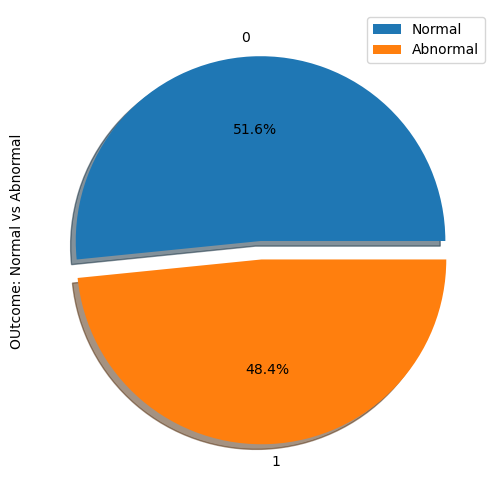

In [190]:
import matplotlib.pyplot as plt

def show_outcome_distrib(df: pd.DataFrame):
    count = ""
    if isinstance(df, pd.DataFrame):
        count = df['Outcome'].value_counts()
    else:
        count = df.value_counts()

    count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6,6), autopct = '%1.1f%%', shadow = True)

    plt.ylabel("OUtcome: Normal vs Abnormal")
    plt.legend(['Normal', 'Abnormal'])
    plt.show()
    
    

show_outcome_distrib(final_df['Outcome'])


## Training: The 80/20 Split and Validation

In [191]:
from sklearn.model_selection import train_test_split

############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    label,
    test_size=0.2, 
    random_state=77
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled, 
    label,
    test_size=0.2, 
    random_state=77
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled, 
    label,
    test_size=0.2, 
    random_state=77
)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    ]


scores = []
acc_list = []
auc_list = []
cm_list = []

for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
    
    
    y_pred = model.predict(X_test_scaled)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))
    
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
# scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)


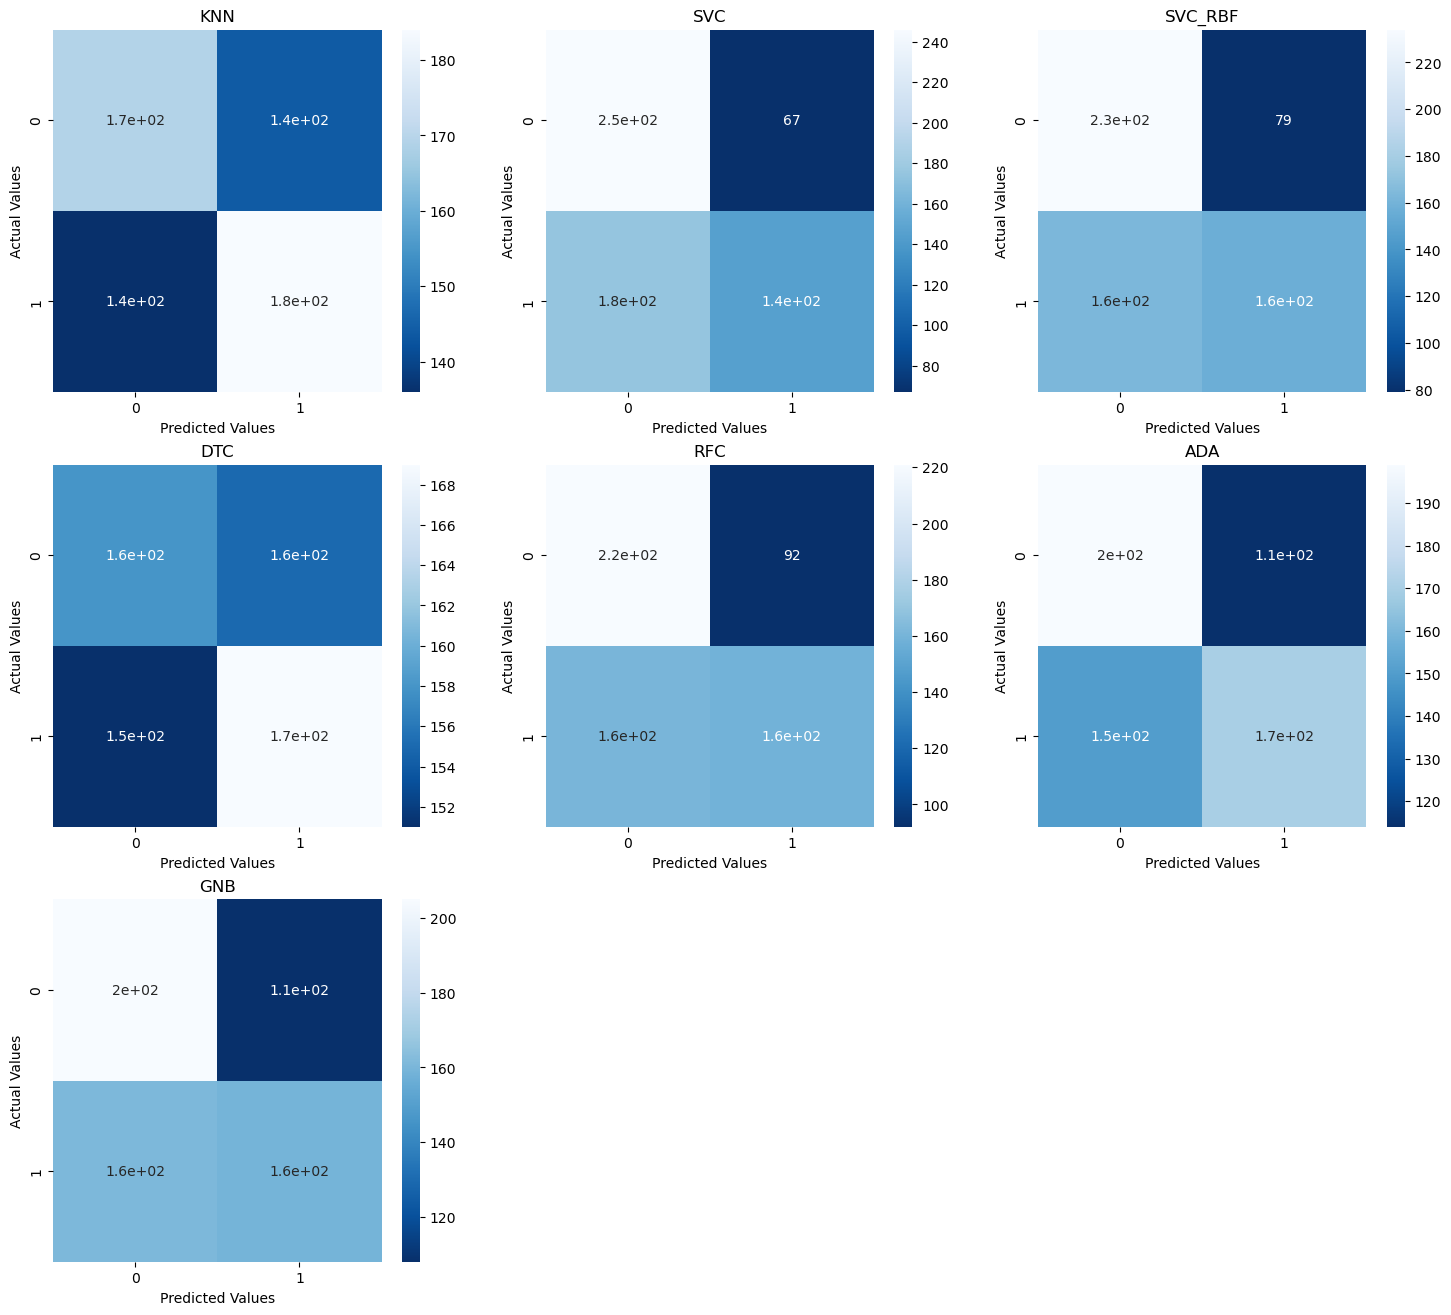

In [208]:
## plot confusion matrix
models = ['KNN', 'SVC', 'SVC_RBF', 'DTC', 'RFC', 'ADA', 'GNB']

fig = plt.figure(figsize = (18, 16))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = models[i]
    sub = fig.add_subplot(3, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [209]:
## Accuracy and AUC
result_df = pd.DataFrame({'Model': models, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,KNN,0.557662,0.56
1,SVC,0.617694,0.62
2,SVC_RBF,0.617694,0.62
3,DTC,0.516588,0.52
4,RFC,0.600316,0.60
5,ADA,0.582938,0.58
6,GNB,0.575039,0.58


In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
1,SVC,61.77%
2,SVC RBF kernel,61.77%
7,QuadraticDiscriminantAnalysis,59.56%
5,AdaBoostClassifier,58.29%
6,GaussianNB,57.50%
4,RandomForestClassifier,57.19%
0,KNeighborsClassifier,55.77%
3,DecisionTreeClassifier,54.19%


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



y = model_df['Outcome']

# To verify if there's potential need for balancing the dataset
show_outcome_distrib(y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=111)


model_list = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []


for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))
